In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
DIR_DATASET = r'C:\Users\Daniel.Vale\Personal\PBDDC\TCC\Projeto\datasets\\'
ARQUIVO_PROPOSICOES = f'{DIR_DATASET}\\despesas_cota_parlamentar.csv'
dfDespesas = pd.read_csv(ARQUIVO_PROPOSICOES,sep=";")
dfDespesas.describe()

,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,codLegislatura,numSubCota,numEspecificacaoSubCota,indTipoDocumento,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
count,1.994330e+05,199433.000000,199433.000000,200287.0,200287.0,200287.000000,200287.000000,200287.000000,200287.000000,200287.000000,200287.000000,200287.000000,200287.0,200287.000000,2.002870e+05,57719.0,33.000000,200287.000000,2.002870e+05
mean,3.225843e+10,167171.015464,299.884854,2019.0,56.0,224.230744,0.278675,1.020660,998.520539,4.003815,993.065519,6.651795,2021.0,0.000739,1.268343e+06,0.0,2361.320000,2755.925342,5.256839e+06
std,2.921291e+10,45990.552344,159.736750,0.0,0.0,395.554885,0.472530,1.579201,2481.425706,63.693526,2472.743760,3.300248,0.0,0.027173,8.072653e+05,0.0,3663.119985,768.341637,3.123679e+06
min,1.608657e+06,62881.000000,1.000000,2019.0,56.0,1.000000,0.000000,0.000000,-3896.520000,0.000000,-6666.000000,1.000000,2021.0,0.000000,0.000000e+00,0.0,8.700000,74.000000,0.000000e+00
25%,5.858393e+09,141531.000000,164.000000,2019.0,56.0,3.000000,0.000000,0.000000,91.000000,0.000000,89.930000,4.000000,2021.0,0.000000,0.000000e+00,0.0,141.960000,2281.000000,1.750736e+06
50%,2.297081e+10,178956.000000,299.000000,2019.0,56.0,10.000000,0.000000,0.000000,248.280000,0.000000,244.340000,7.000000,2021.0,0.000000,1.765752e+06,0.0,256.060000,3073.000000,7.195183e+06
75%,5.115067e+10,204452.000000,443.000000,2019.0,56.0,122.000000,1.000000,1.000000,887.900000,0.000000,882.390000,9.000000,2021.0,0.000000,1.794160e+06,0.0,4195.000000,3321.000000,7.255250e+06
max,9.989866e+10,218245.000000,596.000000,2019.0,56.0,999.000000,4.000000,4.000000,96600.000000,7683.000000,96600.000000,12.000000,2021.0,1.000000,1.828204e+06,0.0,11880.000000,3490.000000,7.330003e+06


In [139]:
df = dfDespesas[['numSubCota','vlrLiquido']]
#df['periodo'] = df['numAno']*100+df['numMes']
df

,numSubCota,vlrLiquido
0,13,526.00
1,13,999.96
2,13,999.96
3,13,999.96
4,13,999.96
...,...,...
200282,3,226.96
200283,3,330.03
200284,5,13000.00
200285,10,3.36


In [157]:
df_100k = df.loc[df['vlrLiquido']!=0]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(df_100k)
data = pd.DataFrame(np_scaled)

data

,0,1
0,-0.534068,-0.188939
1,-0.534068,0.002722
2,-0.534068,0.002722
3,-0.534068,0.002722
4,-0.534068,0.002722
...,...,...
200249,-0.559348,-0.309866
200250,-0.559348,-0.268186
200251,-0.554292,4.855324
200252,-0.541652,-0.400285


In [158]:
pca = PCA(n_components=2)
data = pca.fit_transform(data)

data


array([[ 0.24404308, -0.51124336],
       [ 0.37956784, -0.37571859],
       [ 0.37956784, -0.37571859],
       ...,
       [ 3.82517573,  3.04128878],
       [ 0.09996129, -0.66605034],
       [ 1.07505181,  0.70229719]])

In [159]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

data

,0,1
0,0.240900,-0.518091
1,0.374680,-0.380751
2,0.374680,-0.380751
3,0.374680,-0.380751
4,0.374680,-0.380751
...,...,...
200249,0.174139,-0.622859
200250,0.203231,-0.592993
200251,3.775917,3.082027
200252,0.098674,-0.674972


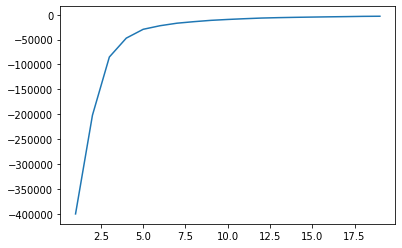

In [160]:
n_cluster = range(1,20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [161]:
df_100k['cluster'] = kmeans[14].predict(data)
df_100k['principal_feature1'] = data[0]
df_100k['principal_feature2'] = data[1]
df_100k['cluster'].value_counts()

C:\Users\Daniel.Vale\AppData\Local\Temp\ipykernel_37676\1336715601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100k['cluster'] = kmeans[14].predict(data)
C:\Users\Daniel.Vale\AppData\Local\Temp\ipykernel_37676\1336715601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100k['principal_feature1'] = data[0]
C:\Users\Daniel.Vale\AppData\Local\Temp\ipykernel_37676\1336715601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

1     108718
12     19369
13     15299
6      15051
7      12076
0      10817
11      7411
2       4125
8       3397
9       2092
4       1246
3        416
5        176
14        48
10        13
Name: cluster, dtype: int64

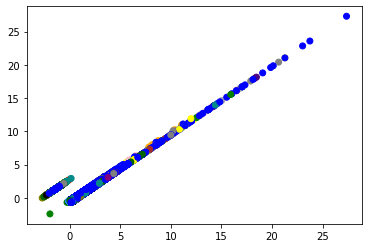

In [162]:
fig, ax = plt.subplots()
colors = {0:'olive', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 
          6:'darkcyan', 7:'yellow', 8:'brown', 9:'purple', 10:'indigo', 
          11: 'grey', 12:'dodgerblue', 13:'darkgreen', 14: 'darkgrey',15: 'red',
         16: 'aqua',17: 'darkgrey',18: 'magenta',19: 'orangered'}
ax.scatter(df_100k['principal_feature1'], df_100k['principal_feature2'], c=df_100k["cluster"].apply(lambda x: colors[x]))
plt.show()

In [170]:
df_100k.loc[df_100k['cluster']==5].sort_values(by=['numSubCota','vlrLiquido'],ascending=True)

,numSubCota,vlrLiquido,cluster,principal_feature1,principal_feature2
4105,1,34200.0,5,9.766869,9.217937
64119,4,26685.0,5,0.955090,0.182500
115922,4,27000.0,5,0.388807,-0.395232
135864,4,27000.0,5,0.290017,-0.496652
64121,4,27685.0,5,0.955090,0.182500
...,...,...,...,...,...
13135,119,31350.0,5,8.754218,8.605842
188126,119,36500.0,5,-1.359767,1.410869
13127,119,37000.0,5,10.348982,10.243052
19034,119,39500.0,5,11.054630,10.967480
